In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using Logistic Regression to fit the training data and predicting the accuracies of the validation set. And plotting the validation set accuracies using the matplotlib.pyplot.

  emoticon_1 emoticon_2 emoticon_3 emoticon_4 emoticon_5 emoticon_6  \
0          😛          🛐          😻          😑          😣          🙠   
1          🛐          😑          😪          😛          🚼          🙯   
2          😛          🙯          😑          🚡          😣          🚼   
3          😛          🚼          🛐          🙐          😣          🙯   
4          🛐          🚟          🚼          😛          🙋          😑   

  emoticon_7 emoticon_8 emoticon_9 emoticon_10 emoticon_11 emoticon_12  \
0          🙯          🚼          😒           🙼           😑           🙯   
1          😣          🚅          😑           🙯           😹           😣   
2          🛐          🙲          😣           🙯           🛑           😑   
3          😑          🙪          😑           🙼           🛆           😣   
4          😣          🙯          😹           🙯           😑           😣   

  emoticon_13  label  
0           😣      0  
1           🙼      0  
2           🙼      0  
3           🙯      1  
4           🙼

C:\Users\kanav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best hyperparameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


C:\Users\kanav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training on 20.0% of data - Train Accuracy: 1.0000, Validation Accuracy: 0.6994, Number of Parameters: 2160


C:\Users\kanav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training on 40.0% of data - Train Accuracy: 1.0000, Validation Accuracy: 0.8221, Number of Parameters: 2160
Training on 60.0% of data - Train Accuracy: 1.0000, Validation Accuracy: 0.8834, Number of Parameters: 2160


C:\Users\kanav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training on 80.0% of data - Train Accuracy: 0.9998, Validation Accuracy: 0.9202, Number of Parameters: 2160
Training on 100.0% of data - Train Accuracy: 0.9999, Validation Accuracy: 0.9284, Number of Parameters: 2160


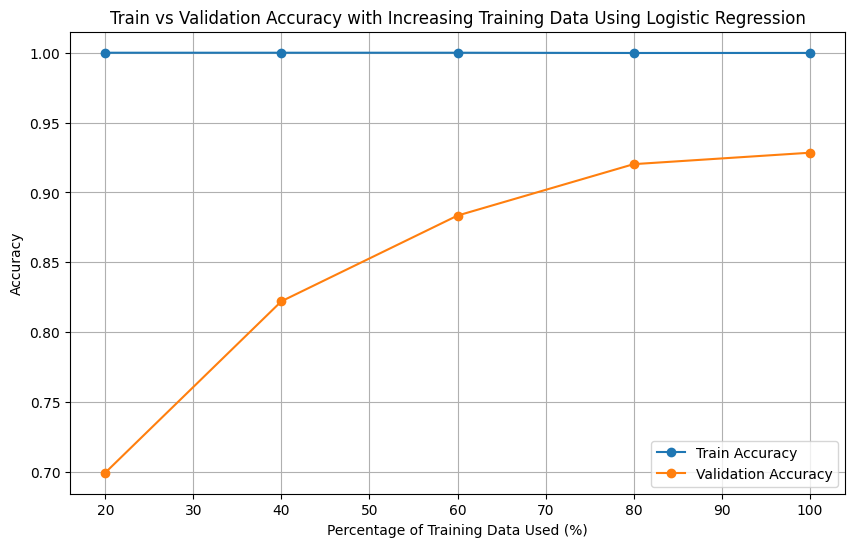

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

training_data = 'train_emoticon.csv'
validation_data = 'valid_emoticon.csv'

# reading the datasets
train_df = pd.read_csv(training_data)
valid_df = pd.read_csv(validation_data)

# splitting the 'input_emoticon' column into separate columns for each emoji
num_emojis = 13  # Number of unique emojis in each training example row
train_df_split = train_df['input_emoticon'].apply(lambda x: pd.Series(list(x)))
valid_df_split = valid_df['input_emoticon'].apply(lambda x: pd.Series(list(x)))
train_df_split.columns = [f'emoticon_{i}' for i in range(1, num_emojis + 1)]
valid_df_split.columns = [f'emoticon_{i}' for i in range(1, num_emojis + 1)]

# combining the split columns with the original 'label' column
train_df_final = pd.concat([train_df_split, train_df['label']], axis=1)
valid_df_final = pd.concat([valid_df_split, valid_df['label']], axis=1)

print(train_df_final.head())

# defining the fractions of the training data to use (from 20% to 100%)
fractions = np.linspace(0.2, 1.0, 5)

# initializing lists to store accuracies and parameter counts
train_accuracies = []
valid_accuracies_1 = []
parameter_counts = []

# initializing the OneHotEncoder and fit it on the combined training and validation data
encoder = OneHotEncoder(handle_unknown='ignore')
combined_data = pd.concat([train_df_final, valid_df_final]).drop(columns=['label'])
encoder.fit(combined_data)

# defining hyperparameter grid for GridSearchCV
param_grid = {
    'penalty': ['l2', 'l1'],
    'C': [0.01, 0.1, 1, 10],  # regularization strengths
    'solver': ['saga'],  # 'saga' solver supports l1, l2
    'max_iter': [1000, 2000]  # maximum number of iterations
}

# initializing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# encoding the full training data
X_train_full_encoded = encoder.transform(train_df_final.drop(columns=['label']))
y_train_full = train_df_final['label']

# fitting the model on the entire training set to find the best hyperparameters
grid_search.fit(X_train_full_encoded, y_train_full)

# extracting the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

for fraction in fractions:
    # subsampling the training data
    train_sample = train_df_final.sample(frac=fraction, random_state=42)

    # separating features and labels for the subsample
    X_train_sample = train_sample.drop(columns=['label'])
    y_train_sample = train_sample['label']

    # encoding the subsampled training data using the pre-fitted encoder
    X_train_encoded = encoder.transform(X_train_sample)

    # initializing and training the LogisticRegression with the best hyperparameters
    model = LogisticRegression(**best_params)
    model.fit(X_train_encoded, y_train_sample)

    # predicting on the training set and compute training accuracy
    y_train_pred = model.predict(X_train_encoded)
    train_accuracy = accuracy_score(y_train_sample, y_train_pred)

    # encoding and predicting on the validation set
    X_valid_encoded = encoder.transform(valid_df_final.drop(columns=['label']))
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(valid_df_final['label'], y_valid_pred)

    # calculating the number of parameters (features + intercepts)
    num_parameters = model.coef_.shape[1] + model.coef_.shape[0]

    # storing accuracies and parameter counts
    train_accuracies.append(train_accuracy)
    valid_accuracies_1.append(valid_accuracy)
    parameter_counts.append(num_parameters)

    print(f"Training on {fraction * 100:.1f}% of data - "
          f"Train Accuracy: {train_accuracy:.4f}, "
          f"Validation Accuracy: {valid_accuracy:.4f}, "
          f"Number of Parameters: {num_parameters}")

# plotting train and validation accuracies against data fractions
plt.figure(figsize=(10, 6))
plt.plot(fractions * 100, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(fractions * 100, valid_accuracies_1, label='Validation Accuracy', marker='o')
plt.xlabel('Percentage of Training Data Used (%)')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy with Increasing Training Data Using Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()



Applying SGD model and fitting training data into the model and plotting the results using the matplotlib.pyplot.

  emoticon_1 emoticon_2 emoticon_3 emoticon_4 emoticon_5 emoticon_6  \
0          😛          🛐          😻          😑          😣          🙠   
1          🛐          😑          😪          😛          🚼          🙯   
2          😛          🙯          😑          🚡          😣          🚼   
3          😛          🚼          🛐          🙐          😣          🙯   
4          🛐          🚟          🚼          😛          🙋          😑   

  emoticon_7 emoticon_8 emoticon_9 emoticon_10 emoticon_11 emoticon_12  \
0          🙯          🚼          😒           🙼           😑           🙯   
1          😣          🚅          😑           🙯           😹           😣   
2          🛐          🙲          😣           🙯           🛑           😑   
3          😑          🙪          😑           🙼           🛆           😣   
4          😣          🙯          😹           🙯           😑           😣   

  emoticon_13  label  
0           😣      0  
1           🙼      0  
2           🙼      0  
3           🙯      1  
4           🙼

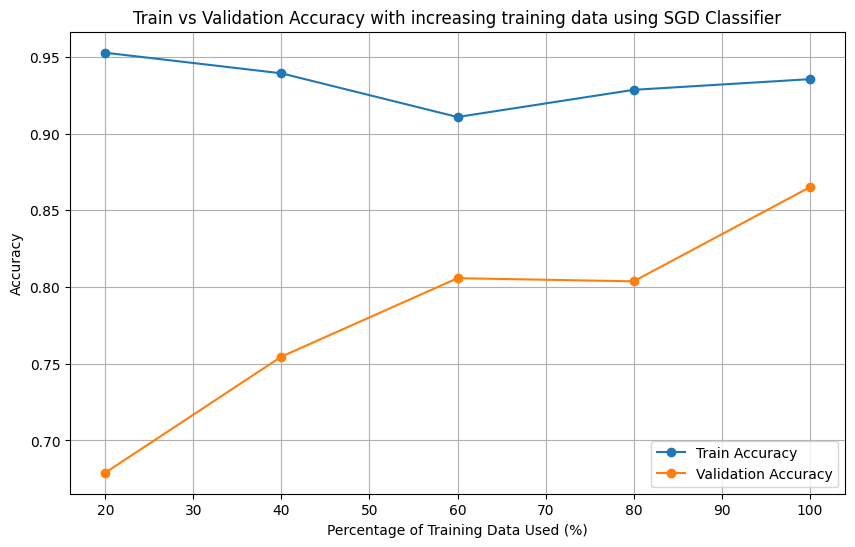

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

new_training_data = 'train_emoticon.csv'
new_validation_data = 'valid_emoticon.csv'

# reading the datasets
train_df = pd.read_csv(new_training_data)
valid_df = pd.read_csv(new_validation_data)

# spliting the 'input_emoticon' column into separate columns for each emoji
train_df_split = train_df['input_emoticon'].apply(lambda x: pd.Series(list(x)))
valid_df_split = valid_df['input_emoticon'].apply(lambda x: pd.Series(list(x)))

num_emojis = 13  # number of unique emojis in the each training example row
train_df_split.columns = [f'emoticon_{i}' for i in range(1, num_emojis + 1)]
valid_df_split.columns = [f'emoticon_{i}' for i in range(1, num_emojis + 1)]

# combining the split columns with the original 'label' column
train_df_final = pd.concat([train_df_split, train_df['label']], axis=1)
valid_df_final = pd.concat([valid_df_split, valid_df['label']], axis=1)

# showing the first few rows of the training set after splitting
print(train_df_final.head())

# defining the fractions of the training data to use (from 20% to 100%)
fractions = np.linspace(0.2, 1.0, 5)

# initializing lists to store accuracies and parameter counts
train_accuracies = []
valid_accuracies_2 = []
parameter_counts = []

# initializing the OneHotEncoder and fit it on the combined training and validation data
encoder = OneHotEncoder()
combined_data = pd.concat([train_df_final, valid_df_final]).drop(columns=['label'])
encoder.fit(combined_data)

# defining hyperparameter grid for GridSearchCV
param_grid = {
    'loss': ['modified_huber', 'perceptron', 'hinge', 'log_loss'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-2, 1e-1, 1],  # Regularization strengths
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.01, 0.1, 1]  # Initial learning rates
}

# initializing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(SGDClassifier(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# encoding the full training data
X_train_full_encoded = encoder.transform(train_df_final.drop(columns=['label']))
y_train_full = train_df_final['label']

# fitting the model on the entire training set to find the best hyperparameters
grid_search.fit(X_train_full_encoded, y_train_full)

# extracting the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

for fraction in fractions:
    # subsample the training data
    train_sample = train_df_final.sample(frac=fraction, random_state=42)

    # separating features and labels for the subsample
    X_train_sample = train_sample.drop(columns=['label'])
    y_train_sample = train_sample['label']

    # encoding the subsampled training data using the pre-fitted encoder
    X_train_encoded = encoder.transform(X_train_sample)

    # intializing and train the SGDClassifier with the best hyperparameters
    model = SGDClassifier(**best_params, max_iter=1000, tol=1e-3)
    model.fit(X_train_encoded, y_train_sample)

    # predicting on the training set and compute training accuracy
    y_train_pred = model.predict(X_train_encoded)
    train_accuracy = accuracy_score(y_train_sample, y_train_pred)

    # encoding and predicting on the validation set
    X_valid_encoded = encoder.transform(valid_df_final.drop(columns=['label']))
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(valid_df_final['label'], y_valid_pred)

    # calculating the number of parameters (features + intercepts)
    num_parameters = model.coef_.shape[1] + model.coef_.shape[0]

    # storing accuracies and parameter counts
    train_accuracies.append(train_accuracy)
    valid_accuracies_2.append(valid_accuracy)
    parameter_counts.append(num_parameters)

    print(f"Training on {fraction * 100:.1f}% of data - "
          f"Train Accuracy: {train_accuracy:.4f}, "
          f"Validation Accuracy: {valid_accuracy:.4f}, "
          f"Number of Parameters: {num_parameters}")

# plotting train and validation accuracies against data fractions
plt.figure(figsize=(10, 6))
plt.plot(fractions * 100, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(fractions * 100, valid_accuracies_2, label='Validation Accuracy', marker='o')
plt.xlabel('Percentage of Training Data Used (%)')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy with increasing training data using SGD Classifier')
plt.legend()
plt.grid(True)
plt.show()


Pre-processing the dataset and extracting the useful information from the training data for better validation data accuracy.

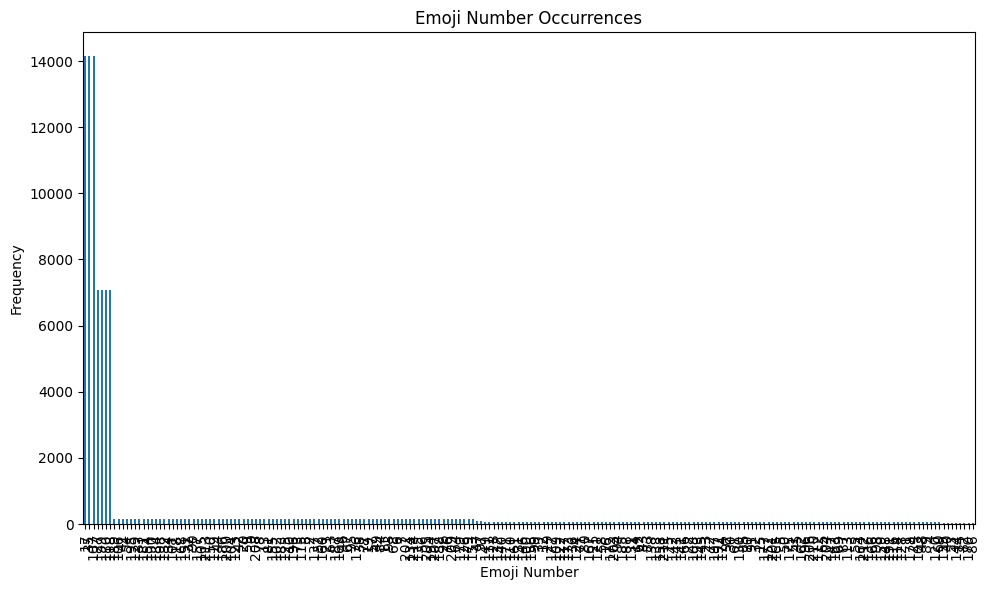

In [8]:
# loading the CSV file
file_path = 'train_emoticon.csv'
df = pd.read_csv(file_path)

# spliting the emojis in the input_emoticon column
df['split_emojis'] = df['input_emoticon'].apply(list)

# creating a dictionary to assign each unique emoji a unique number
unique_emojis = sorted(set([emoji for sublist in df['split_emojis'] for emoji in sublist]))
emoji_to_num = {emoji: idx + 1 for idx, emoji in enumerate(unique_emojis)}

# replacing the emojis in each row with their corresponding numbers
df['emoticon_numbers'] = df['split_emojis'].apply(lambda emojis: [emoji_to_num[emoji] for emoji in emojis])

# flattening the list of numbers to count the occurrences
all_numbers = [num for sublist in df['emoticon_numbers'] for num in sublist]

# creating a pandas Series to count occurrences of each number
emoji_count = pd.Series(all_numbers).value_counts()

# plotting the histogram of occurrences
plt.figure(figsize=(10, 6))
emoji_count.plot(kind='bar')
plt.title('Emoji Number Occurrences')
plt.xlabel('Emoji Number')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Extraction of useful features from the original dataset by elimination of top 7 freqent emojis from the original dataset.

In [9]:
# converting number to their respective emoji
num_to_emoji = {v: k for k, v in emoji_to_num.items()}

# obtaining the top 7 most frequent emoji numbers
top_7_numbers = emoji_count.nlargest(7)

# summing the occurrences of the top 7
sum_top_7 = top_7_numbers.sum()

# storing the corresponding emojis in a set
top_7_emojis = set([num_to_emoji[num] for num in top_7_numbers.index])

# printing the results
print("Sum of occurrences of the top 7 emojis:", sum_top_7)
print("Set of top 7 emojis:", top_7_emojis)



Sum of occurrences of the top 7 emojis: 70800
Set of top 7 emojis: {'😑', '😣', '🛐', '🙯', '🙼', '🚼', '😛'}


Loading training and validation data into dataframe and extracing useful information from it.

In [10]:
top_7_emojis = {'😛', '🛐', '🙯', '😑', '😣', '🚼', '🙼'}  # Replace with actual top 7 emojis

# loading the train_emoticon.csv file
train_file_path = 'train_emoticon.csv'
train_df = pd.read_csv(train_file_path)

# spliting the emojis in the input_emoticon column
train_df['split_emojis'] = train_df['input_emoticon'].apply(list)

# function to remove the top 7 emojis from each row
def remove_top_7_emojis(emojis):
    return [emoji for emoji in emojis if emoji not in top_7_emojis]

# removing the top 7 emojis from the training dataset
train_df['filtered_emoticons'] = train_df['split_emojis'].apply(remove_top_7_emojis)

# joining the filtered emojis back into a string
train_df['filtered_emoticons_str'] = train_df['filtered_emoticons'].apply(''.join)

# saving the new training dataset to a CSV file without the top 7 emojis
train_df[['filtered_emoticons_str', 'label']].to_csv('train_dataset_without_top7_emojis.csv', index=False)

print("New CSV file 'train_dataset_without_top7_emojis.csv' has been created, excluding the top 7 most frequent emojis.")


# similary for validation data

# loading the valid_emoticon.csv file
valid_file_path = 'valid_emoticon.csv'
valid_df = pd.read_csv(valid_file_path)

# spliting the emojis in the input_emoticon column
valid_df['split_emojis'] = valid_df['input_emoticon'].apply(list)

# removing the top 7 emojis from the valid dataset
valid_df['filtered_emoticons'] = valid_df['split_emojis'].apply(remove_top_7_emojis)

# joining the filtered emojis back into a string
valid_df['filtered_emoticons_str'] = valid_df['filtered_emoticons'].apply(''.join)

# saving the new valid dataset to a CSV file without the top 7 emojis
valid_df[['filtered_emoticons_str', 'label']].to_csv('valid_dataset_without_top7_emojis.csv', index=False)

print("New CSV file 'valid_dataset_without_top7_emojis.csv' has been created, excluding the top 7 most frequent emojis.")

New CSV file 'train_dataset_without_top7_emojis.csv' has been created, excluding the top 7 most frequent emojis.
New CSV file 'valid_dataset_without_top7_emojis.csv' has been created, excluding the top 7 most frequent emojis.


Applying SGD to the new training data to build the model. Plotting the training and validation data accuracy for the built model.

  emoticon_1 emoticon_2 emoticon_3  label
0          😻          🙠          😒      0
1          😪          🚅          😹      0
2          🚡          🙲          🛑      0
3          🙐          🙪          🛆      1
4          🚟          🙋          😹      1
Best hyperparameters: {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'invscaling', 'loss': 'perceptron', 'penalty': 'l2'}
Training on 20.0% of data - Train Accuracy: 0.9887, Validation Accuracy: 0.8180, Number of Parameters: 502
Training on 40.0% of data - Train Accuracy: 0.9880, Validation Accuracy: 0.9018, Number of Parameters: 502
Training on 60.0% of data - Train Accuracy: 0.9906, Validation Accuracy: 0.9202, Number of Parameters: 502
Training on 80.0% of data - Train Accuracy: 0.9899, Validation Accuracy: 0.9550, Number of Parameters: 502
Training on 100.0% of data - Train Accuracy: 0.9888, Validation Accuracy: 0.9652, Number of Parameters: 502


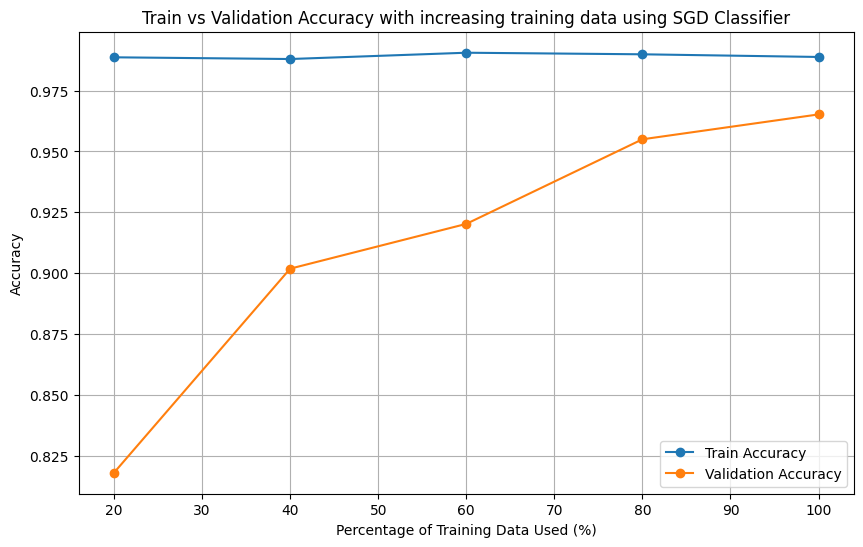

In [11]:
new_training_data = 'train_dataset_without_top7_emojis.csv'
new_validation_data = 'valid_dataset_without_top7_emojis.csv'

# reading the datasets
train_df = pd.read_csv(new_training_data)
valid_df = pd.read_csv(new_validation_data)

# spliting the 'filtered_emoticons_str' column into separate columns for each emoji
train_df_split = train_df['filtered_emoticons_str'].apply(lambda x: pd.Series(list(x)))
valid_df_split = valid_df['filtered_emoticons_str'].apply(lambda x: pd.Series(list(x)))

num_emojis = 3  # number of unique emojis in the each training example row
train_df_split.columns = [f'emoticon_{i}' for i in range(1, num_emojis + 1)]
valid_df_split.columns = [f'emoticon_{i}' for i in range(1, num_emojis + 1)]

# combining the split columns with the original 'label' column
train_df_final = pd.concat([train_df_split, train_df['label']], axis=1)
valid_df_final = pd.concat([valid_df_split, valid_df['label']], axis=1)

# showing the first few rows of the training set after splitting
print(train_df_final.head())

# defining the fractions of the training data to use (from 20% to 100%)
fractions = np.linspace(0.2, 1.0, 5)

# initializing lists to store accuracies and parameter counts
train_accuracies = []
valid_accuracies_3 = []
parameter_counts = []

# initializing the OneHotEncoder and fit it on the combined training and validation data
encoder = OneHotEncoder()
combined_data = pd.concat([train_df_final, valid_df_final]).drop(columns=['label'])
encoder.fit(combined_data)

# defining hyperparameter grid for GridSearchCV
param_grid = {
    'loss': ['modified_huber', 'perceptron', 'hinge', 'log_loss'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-2, 1e-1, 1],  # Regularization strengths
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.01, 0.1, 1]  # Initial learning rates
}

# initializing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(SGDClassifier(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# encoding the full training data
X_train_full_encoded = encoder.transform(train_df_final.drop(columns=['label']))
y_train_full = train_df_final['label']

# fitting the model on the entire training set to find the best hyperparameters
grid_search.fit(X_train_full_encoded, y_train_full)

# extracting the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

for fraction in fractions:
    # subsample the training data
    train_sample = train_df_final.sample(frac=fraction, random_state=42)

    # separating features and labels for the subsample
    X_train_sample = train_sample.drop(columns=['label'])
    y_train_sample = train_sample['label']

    # encoding the subsampled training data using the pre-fitted encoder
    X_train_encoded = encoder.transform(X_train_sample)

    # intializing and train the SGDClassifier with the best hyperparameters
    model = SGDClassifier(**best_params, max_iter=1000, tol=1e-3)
    model.fit(X_train_encoded, y_train_sample)

    # predicting on the training set and compute training accuracy
    y_train_pred = model.predict(X_train_encoded)
    train_accuracy = accuracy_score(y_train_sample, y_train_pred)

    # encoding and predicting on the validation set
    X_valid_encoded = encoder.transform(valid_df_final.drop(columns=['label']))
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(valid_df_final['label'], y_valid_pred)

    # calculating the number of parameters (features + intercepts)
    num_parameters = model.coef_.shape[1] + model.coef_.shape[0]

    # storing accuracies and parameter counts
    train_accuracies.append(train_accuracy)
    valid_accuracies_3.append(valid_accuracy)
    parameter_counts.append(num_parameters)

    print(f"Training on {fraction * 100:.1f}% of data - "
          f"Train Accuracy: {train_accuracy:.4f}, "
          f"Validation Accuracy: {valid_accuracy:.4f}, "
          f"Number of Parameters: {num_parameters}")

# plotting train and validation accuracies against data fractions
plt.figure(figsize=(10, 6))
plt.plot(fractions * 100, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(fractions * 100, valid_accuracies_3, label='Validation Accuracy', marker='o')
plt.xlabel('Percentage of Training Data Used (%)')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy with increasing training data using SGD Classifier')
plt.legend()
plt.grid(True)
plt.show()


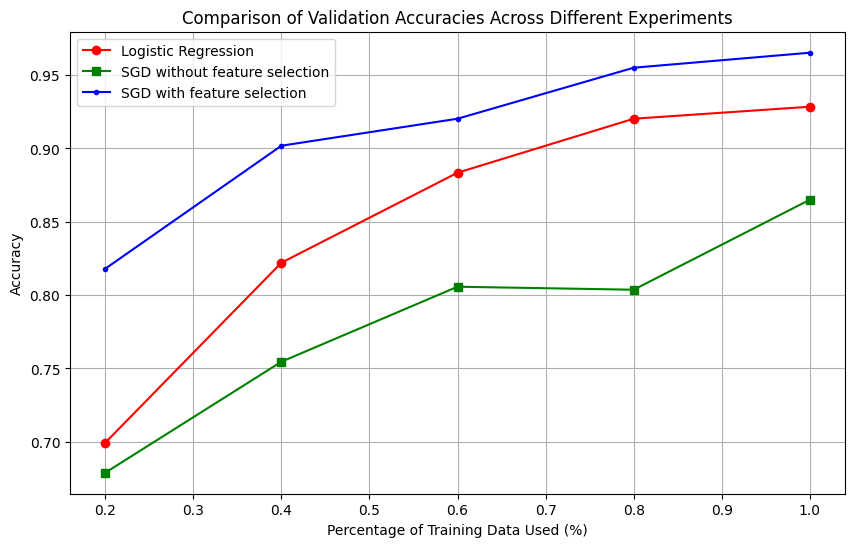

In [12]:
plt.figure(figsize=(10, 6))

# Example: you might have three different lists of validation accuracies
plt.plot(fractions, valid_accuracies_1, label='Logistic Regression', marker='o', color='red')
plt.plot(fractions, valid_accuracies_2, label='SGD without feature selection', marker='s', color='green')
plt.plot(fractions, valid_accuracies_3, label='SGD with feature selection', marker='.', color='blue')


# Add more lines if necessary for more experiments or metrics
plt.xlabel('Percentage of Training Data Used (%)')
plt.ylabel('Accuracy')
plt.title('Comparison of Validation Accuracies Across Different Experiments')
plt.legend()
plt.grid(True)
plt.show()

Conclusion : 
Best model => SGD model with feature selection
This model is giving around 96% accuracy on validation set for 100% training data.